<a href="https://colab.research.google.com/github/sojiseung/sjs0424/blob/main/m3_%EB%B6%84%EC%84%9D_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC/%EC%8B%A4%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  아래 가이드에 따라서 1000명의 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.
고객별 속성 데이터
- id : 1 ~ 1000 고객 번호
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- no : 1 ~ 10000번 일련번호
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- amount_20 : price_20 * quantity_20
- amount_21 : price_21 * quantity_21

#### Q2. df를 수정하여 3가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요

#### Q3. df 를 탐색적 분석을 통하여 인사이트를 도출하세요.

merge customer기준으로 하기
replace = True => choice

In [36]:
import pandas as pd
import numpy as np
import random
from datetime import datetime
import time
from scipy.stats import norm

In [70]:
product = [10,20,30]
dtt = pd.date_range(start='2020-01-01',end='2021-12-31').date
dates = list(np.random.choice(dtt, replace=True) for i in range(10000))
date1 = pd.Series(dates)
date = pd.to_datetime(date1)
days = date.dt.day_name()

product = pd.DataFrame({
    'id' : np.random.randint(1,1001,10000),
    'no' : range(1,10001),
    'date' : dates,
    'day' : days,
    'product' : (np.random.choice(product, replace=True) for i in range(10000)),
    'price' : (np.random.uniform(1000,70000) for i in range(10000)),
    'quantity' : (np.random.randint(1,101,10000)),
    'time' : np.random.randint(1,25,10000)
})
product['price'] = round(product['price'],2)
product['amount'] = round(product['price'] * product['quantity'],2)

rg = ['suwon','seoul','incheon','busan','jeju']
customer = pd.DataFrame({
    'id' : range(1,1001),
    'gender' : (np.random.randint(0,2) for i in range(1000)),
    'age' : (np.random.randint(10,80) for i in range(1000)),
    'region' : (np.random.choice(rg, replace=True) for i in range(1000))
})
pro_cus = pd.merge(customer, product, on='id', how='inner')
pro_cus['day']=pro_cus['date'].apply(lambda x: x.weekday())
pro_cus['day']=pro_cus['day'].replace(list(range(7)),['월','화','수','목','금','토','일'])

pro_cus.head()

,id,gender,age,region,no,date,day,product,price,quantity,time,amount
0,1,0,58,incheon,2086,2021-10-18,월,20,13961.14,64,23,893512.96
1,1,0,58,incheon,3031,2021-05-28,금,20,14597.15,100,11,1459715.00
2,1,0,58,incheon,3208,2021-07-23,금,10,40109.94,8,11,320879.52
3,1,0,58,incheon,6855,2021-01-28,목,20,3294.38,90,10,296494.20
4,1,0,58,incheon,7320,2020-06-16,화,30,69243.94,84,23,5816490.96


In [71]:
# 날짜 등급으로 변경
bins = [0,20,40,50,60,70,80]
labels = [1,2,3,4,5,6]
pro_cus['age_ca'] = pd.cut(pro_cus['age'], bins=bins, labels=labels)
pro_cus.drop(columns=['age'], inplace=True)
pro_cus.head()

,id,gender,region,no,date,day,product,price,quantity,time,amount,age_ca
0,1,0,incheon,2086,2021-10-18,월,20,13961.14,64,23,893512.96,4
1,1,0,incheon,3031,2021-05-28,금,20,14597.15,100,11,1459715.00,4
2,1,0,incheon,3208,2021-07-23,금,10,40109.94,8,11,320879.52,4
3,1,0,incheon,6855,2021-01-28,목,20,3294.38,90,10,296494.20,4
4,1,0,incheon,7320,2020-06-16,화,30,69243.94,84,23,5816490.96,4


In [31]:
pro_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        10000 non-null  int64   
 1   gender    10000 non-null  int64   
 2   region    10000 non-null  object  
 3   no        10000 non-null  int64   
 4   date      10000 non-null  object  
 5   day       10000 non-null  object  
 6   product   10000 non-null  int64   
 7   price     10000 non-null  float64 
 8   quantity  10000 non-null  int64   
 9   time      10000 non-null  int64   
 10  amount    10000 non-null  float64 
 11  age_ca    10000 non-null  category
dtypes: category(1), float64(2), int64(6), object(3)
memory usage: 869.5+ KB


Text(0.5, 1.0, 'Amount')

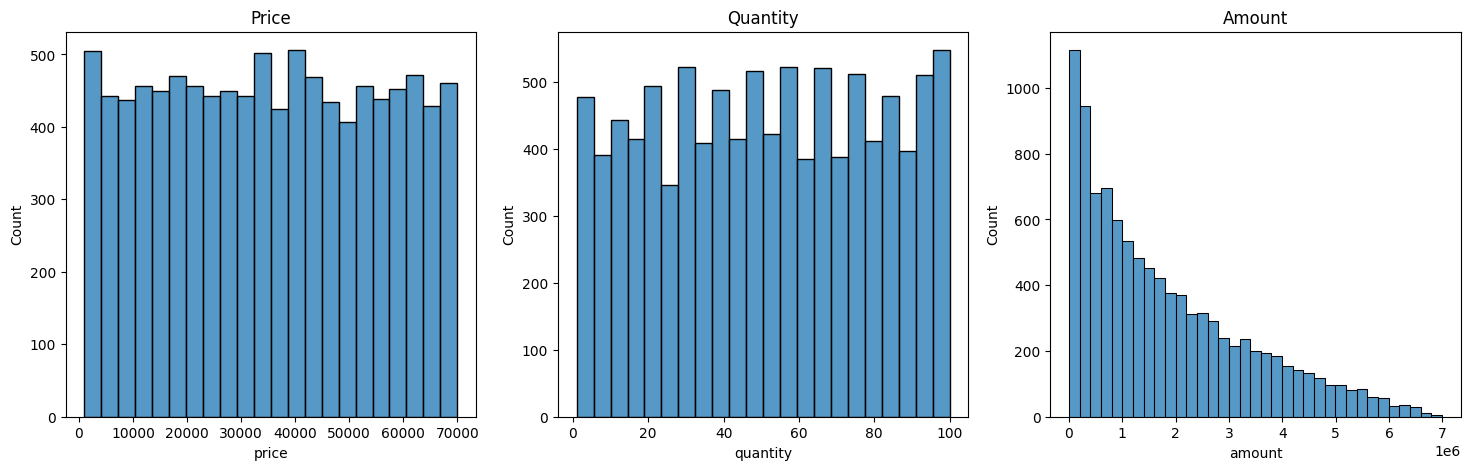

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(pro_cus['price'], ax=axes[0])
axes[0].set_title('Price')

sns.histplot(pro_cus['quantity'], ax=axes[1])
axes[1].set_title('Quantity')

sns.histplot(pro_cus['amount'], ax=axes[2])
axes[2].set_title('Amount')

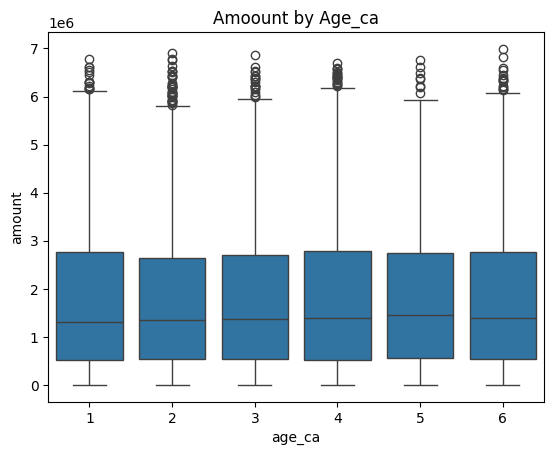

In [73]:
sns.boxplot(x = 'age_ca', y = 'amount', data = pro_cus)
plt.title('Amoount by Age_ca')
plt.show()

In [129]:
np.random.seed(30)

mu_price, sigma_price = norm.fit(pro_cus['price'])
pro_cus['price'] = np.random.normal(mu_price, 8500, pro_cus.shape[0])   # np.random.normal(평균, 표준편차, pro_cus에 행 갯수([1]이면 열))
                                                                        # 표준편차가 크면 0보다 낮은 숫자가 나올수있다
mu_quantity, sigma_quantity = norm.fit(pro_cus['quantity'])
pro_cus['quantity'] = np.random.normal(mu_quantity, 13, pro_cus.shape[0])

mu_amount, sigma_amount = norm.fit(pro_cus['amount'])
pro_cus['amount'] = np.random.normal(mu_amount, sigma_amount, pro_cus.shape[0])

Text(0.5, 1.0, 'Amount')

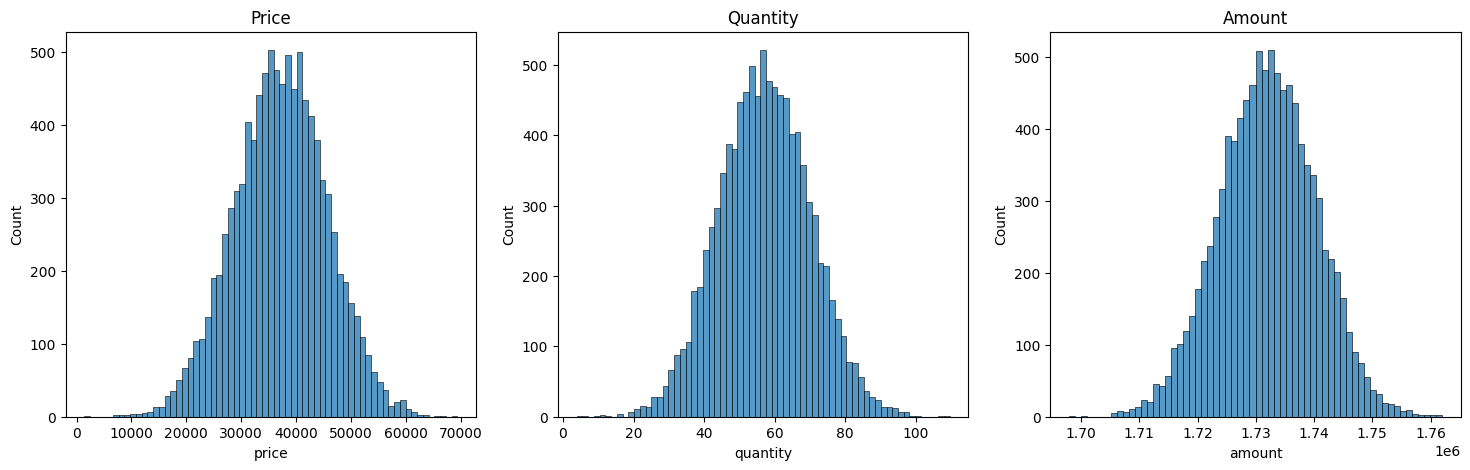

In [130]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(pro_cus['price'], ax=axes[0])
axes[0].set_title('Price')

sns.histplot(pro_cus['quantity'], ax=axes[1])
axes[1].set_title('Quantity')

sns.histplot(pro_cus['amount'], ax=axes[2])
axes[2].set_title('Amount')

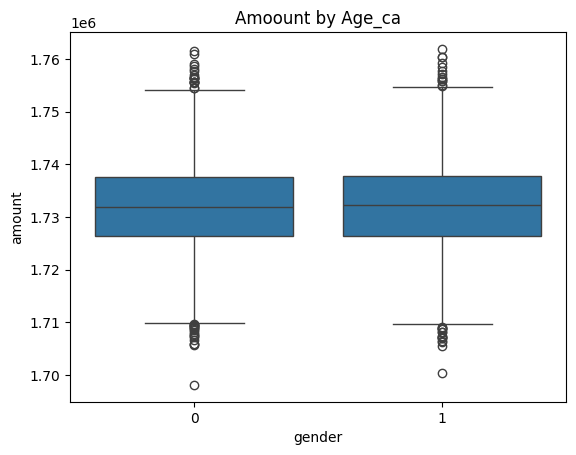

In [128]:
sns.boxplot(x = 'gender', y = 'amount', data = pro_cus)
plt.title('Amoount by Age_ca')
plt.show()

<Axes: xlabel='age_ca', ylabel='time'>

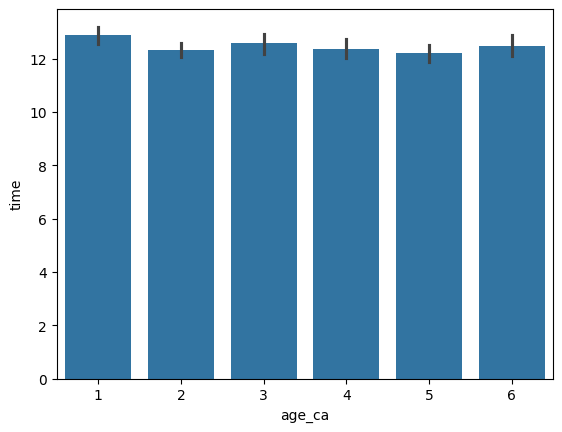

In [50]:
sns.barplot(x = pro_cus['age_ca'], y = pro_cus['time'])